In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
train = pd.read_csv(os.getcwd() + '/train.csv')
test = pd.read_csv(os.getcwd() + '/test.csv')
submission = pd.read_csv(os.getcwd() + '/submission.csv')
train.shape, test.shape

((17996, 17), (7713, 16))

In [3]:
train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [6]:
train['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

Classes 0, 7, 3, 4 are less in number and needs to be balanced

In [7]:
train.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
train['duration_in min/ms'][train['duration_in min/ms'] > 30] = train['duration_in min/ms'][train['duration_in min/ms'] > 30]/60000

<ipython-input-8-5eef2706eb01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['duration_in min/ms'][train['duration_in min/ms'] > 30] = train['duration_in min/ms'][train['duration_in min/ms'] > 30]/60000


In [9]:
train

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,3.909933,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,2.899467,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,3.224167,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,4.284450,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,3.603700,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,3.661550,4,8


In [10]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 10)

In [11]:
columns  = ['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature']

In [12]:
train_df = train[columns]

In [13]:
train1 = knn.fit_transform(train_df)

In [14]:
train1

array([[ 60.        ,   0.854     ,   0.564     , ..., 134.071     ,
          3.90993333,   4.        ],
       [ 54.        ,   0.382     ,   0.814     , ..., 116.454     ,
          4.19555   ,   4.        ],
       [ 35.        ,   0.434     ,   0.614     , ..., 147.681     ,
          1.82778333,   4.        ],
       ...,
       [ 34.        ,   0.558     ,   0.981     , ..., 105.        ,
          3.6037    ,   4.        ],
       [ 29.        ,   0.215     ,   0.805     , ..., 131.363     ,
          3.66155   ,   4.        ],
       [ 43.        ,   0.4       ,   0.853     , ..., 138.102     ,
          3.03711667,   4.        ]])

In [15]:
train1 = pd.DataFrame(train1, columns = columns)

In [21]:
x = train1
y = train['Class']

In [17]:
from imblearn.over_sampling import SMOTE

In [22]:
oversample = SMOTE()

In [25]:
x, y = oversample.fit_resample(x, y)

In [138]:
import category_encoders as ce

In [140]:
#def preprocessing(data):
    data.Popularity = data.Popularity.fillna(data.Popularity.dropna().median())
    data.key = data.key.fillna(data.key.dropna().median())
    data.instrumentalness = data.instrumentalness.fillna(data.instrumentalness.dropna().mean())
    data['time_signature'] = data['time_signature'].apply(lambda x : 1 if x ==4 else 0)
    return data

In [141]:
x = preprocessing(train)

<ipython-input-140-b778665c557e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_in min/ms'][data['duration_in min/ms'] > 30] = data['duration_in min/ms'][data['duration_in min/ms'] > 30]/60000


In [142]:
encoders = ce.CountEncoder(cols = ['Artist Name'], handle_unknown = 1)
x1 = encoders.fit_transform(x)

/Users/sathishkumars/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [143]:
test1 = preprocessing(test)
test2 = encoders.fit_transform(test1)

<ipython-input-140-b778665c557e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_in min/ms'][data['duration_in min/ms'] > 30] = data['duration_in min/ms'][data['duration_in min/ms'] > 30]/60000
/Users/sathishkumars/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [146]:
import seaborn as sns

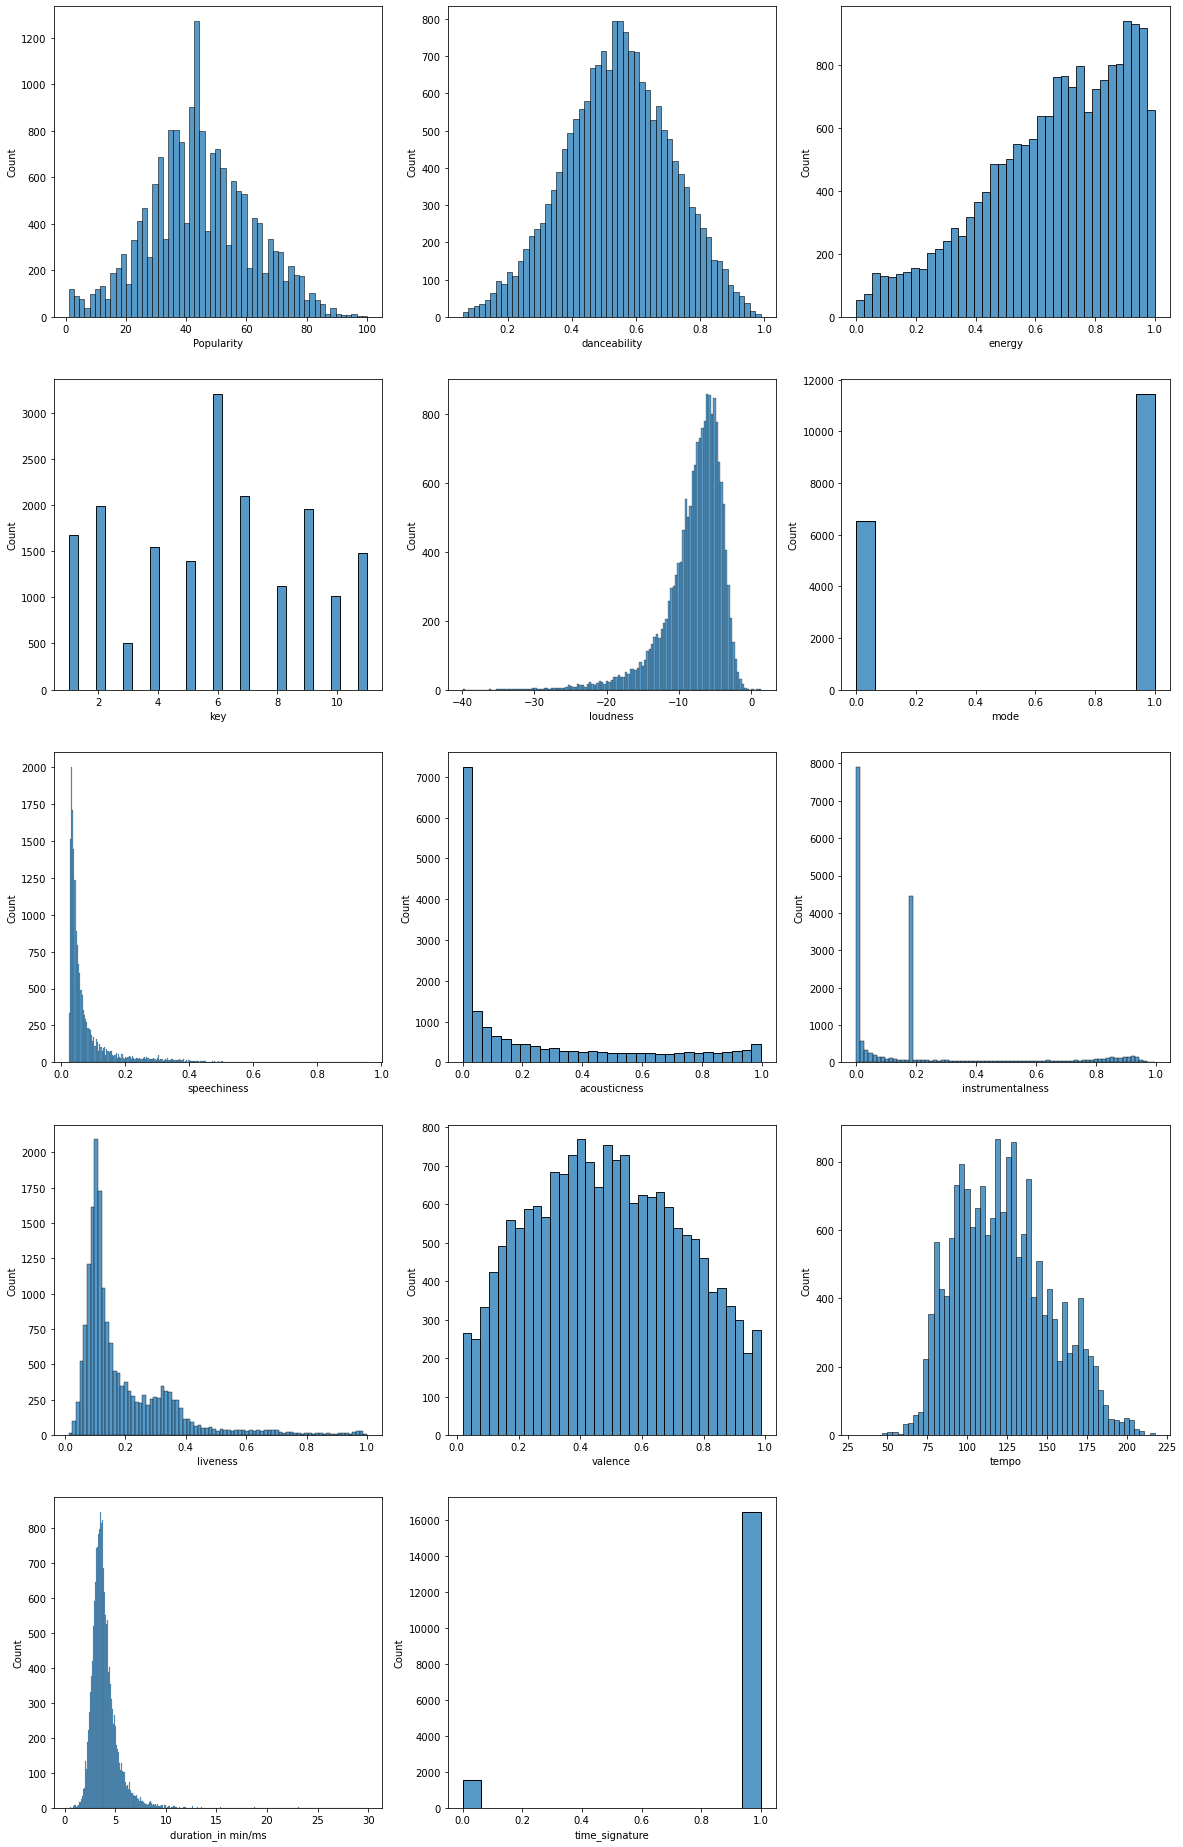

In [147]:
plt.figure(figsize = (20,40))
for i in range(len(columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(data = train, x = columns[i])
plt.show()

# Visualisation

In [148]:
import seaborn as sns
sns.set_style('whitegrid')

In [149]:
train.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

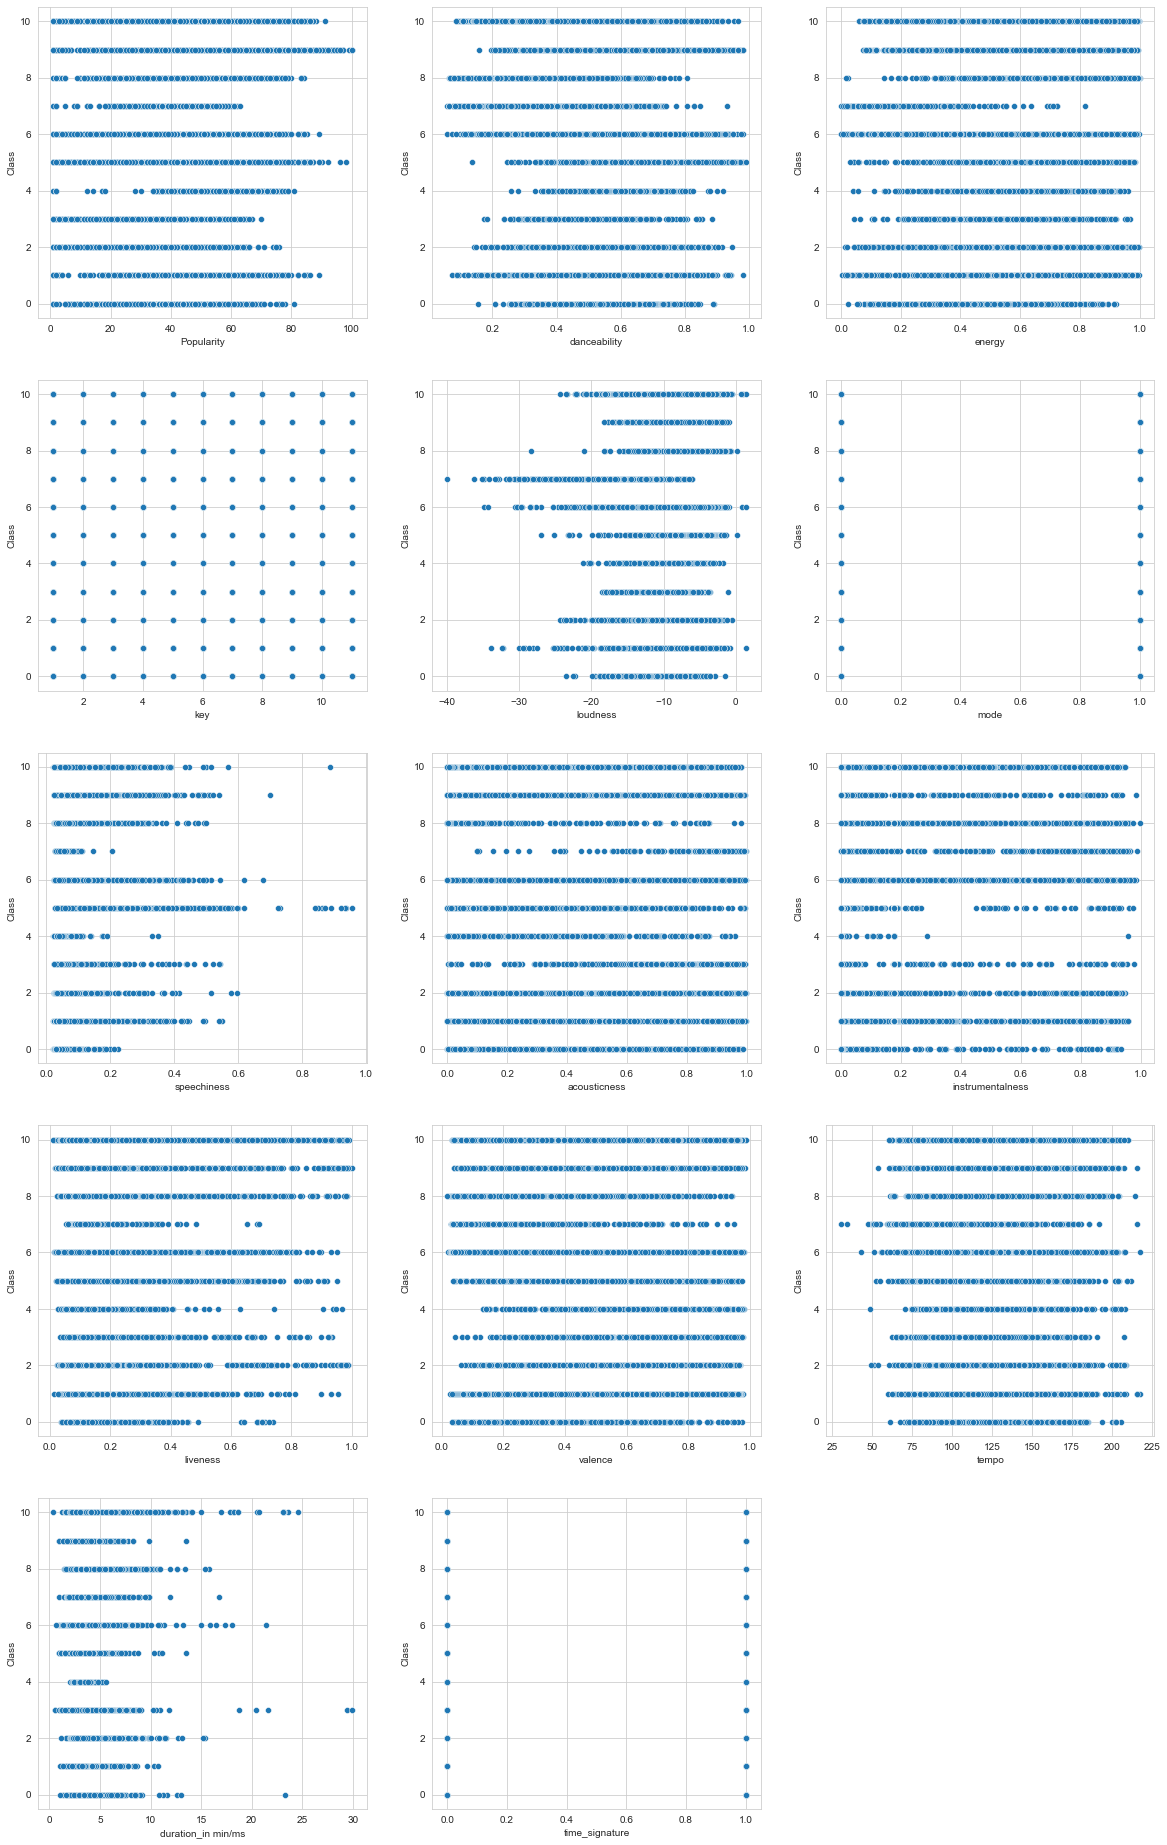

In [150]:
plt.figure(figsize = (20,40))
for i in range(len(columns)):
    plt.subplot(6, 3, i+1)
    sns.scatterplot(x = train[columns[i]], y = train['Class'])
plt.show()

In [151]:
corr = x1.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Artist Name,1.000000,0.022242,0.022167,0.021662,0.005740,0.083566,-0.031195,-0.097729,-0.009740,-0.096984,-0.004386,0.051142,-0.008742,0.015046,0.027968,0.179139
Popularity,0.022242,1.000000,0.165469,0.050873,0.005505,0.122428,0.016321,0.031329,-0.123594,-0.137549,-0.071643,0.054171,-0.005924,-0.105367,0.093985,0.158493
danceability,0.022167,0.165469,1.000000,-0.093838,0.006290,0.059723,-0.067135,0.199042,0.009055,-0.174594,-0.109485,0.444548,-0.183527,-0.232649,0.191083,-0.097681
energy,0.021662,0.050873,-0.093838,1.000000,0.014780,0.767869,-0.035880,0.125427,-0.745963,-0.162967,0.195634,0.222998,0.210224,-0.012034,0.207767,0.217328
key,0.005740,0.005505,0.006290,0.014780,1.000000,0.002397,-0.106508,0.001513,-0.008485,0.001112,0.014141,0.029965,0.013156,-0.000759,0.014535,-0.007365
loudness,0.083566,0.122428,0.059723,0.767869,0.002397,1.000000,-0.033650,0.096027,-0.612824,-0.318254,0.112022,0.181086,0.164272,-0.112237,0.175252,0.177872
mode,-0.031195,0.016321,-0.067135,-0.035880,-0.106508,-0.033650,1.000000,-0.074609,0.024035,-0.023207,-0.001563,-0.002986,0.021211,-0.008445,-0.012050,-0.044740
speechiness,-0.097729,0.031329,0.199042,0.125427,0.001513,0.096027,-0.074609,1.000000,-0.086648,-0.046984,0.070406,0.053885,0.048948,-0.113281,0.015903,-0.059349
acousticness,-0.009740,-0.123594,0.009055,-0.745963,-0.008485,-0.612824,0.024035,-0.086648,1.000000,0.156548,-0.111393,-0.122547,-0.168318,-0.008050,-0.191218,-0.237138
instrumentalness,-0.096984,-0.137549,-0.174594,-0.162967,0.001112,-0.318254,-0.023207,-0.046984,0.156548,1.000000,-0.041528,-0.202680,-0.033423,0.110783,-0.085167,-0.022491


In [152]:
x1.skew()

Artist Name           3.864423
Popularity            0.078741
danceability         -0.083522
energy               -0.661169
key                  -0.063654
loudness             -1.761383
mode                 -0.568742
speechiness           3.088002
acousticness          1.105497
instrumentalness      1.759846
liveness              2.176072
valence               0.089928
tempo                 0.379619
duration_in min/ms    4.028887
time_signature       -2.956902
Class                -0.666686
dtype: float64

# Evaluation

In [225]:
X = x1.drop(['Artist Name','Track Name','Class'], axis = 1)
Y = train['Class']

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()

In [211]:
X = scaler_mm.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from catboost import CatBoostClassifier
LR = LogisticRegression()
RF = RandomForestClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
mNB = MultinomialNB()
bNB = BernoulliNB()
CB = CatBoostClassifier()
from sklearn.metrics import log_loss, accuracy_score

In [30]:
LR.fit(xTrain, yTrain)

/Users/sathishkumars/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
pred_LR = LR.predict(xTest)

In [32]:
predprob_LR = LR.predict_proba(xTest)

In [33]:
log_loss(yTest, predprob_LR)

1.9673119047683654

In [34]:
accuracy_score(yTest, pred_LR)

0.31181116825863336

In [35]:
RF.fit(xTrain, yTrain)
pred_RF = RF.predict(xTest)
predprob_RF = RF.predict_proba(xTest)

In [36]:
log_loss(yTest, predprob_RF), accuracy_score(yTest, pred_RF)

(0.9287241993453026, 0.7564290962527553)

In [37]:
xgb.fit(xTrain, yTrain)
pred_xgb = xgb.predict(xTest)
predprob_xgb = xgb.predict_proba(xTest)

/Users/sathishkumars/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
log_loss(yTest, predprob_xgb), accuracy_score(yTest, pred_xgb)

(0.7873850132476164, 0.7173034533431301)

In [39]:
lgb.fit(xTrain, yTrain)
pred_lgb = lgb.predict(xTest)
predprob_lgb = lgb.predict_proba(xTest)
log_loss(yTest, predprob_lgb), accuracy_score(yTest, pred_lgb)

(0.8123230955214785, 0.7163850110213079)

In [96]:
CB.fit(xTrain, yTrain)
pred_cb = CB.predict(xTest)
predprob_cb = CB.predict_proba(xTest)
log_loss(yTest, predprob_cb), accuracy_score(yTest, pred_cb)

Learning rate set to 0.090655
0:	learn: 2.2558350	total: 74.6ms	remaining: 1m 14s
1:	learn: 2.1587312	total: 86.2ms	remaining: 43s
2:	learn: 2.0870349	total: 98ms	remaining: 32.6s
3:	learn: 2.0207454	total: 111ms	remaining: 27.6s
4:	learn: 1.9647597	total: 123ms	remaining: 24.5s
5:	learn: 1.9221457	total: 135ms	remaining: 22.3s
6:	learn: 1.8752729	total: 147ms	remaining: 20.8s
7:	learn: 1.8410195	total: 158ms	remaining: 19.6s
8:	learn: 1.8101275	total: 170ms	remaining: 18.7s
9:	learn: 1.7787802	total: 182ms	remaining: 18s
10:	learn: 1.7526525	total: 194ms	remaining: 17.5s
11:	learn: 1.7268151	total: 207ms	remaining: 17s
12:	learn: 1.7064797	total: 221ms	remaining: 16.8s
13:	learn: 1.6860006	total: 233ms	remaining: 16.4s
14:	learn: 1.6662441	total: 245ms	remaining: 16.1s
15:	learn: 1.6490756	total: 256ms	remaining: 15.8s
16:	learn: 1.6362493	total: 269ms	remaining: 15.5s
17:	learn: 1.6232909	total: 281ms	remaining: 15.3s
18:	learn: 1.6095841	total: 293ms	remaining: 15.1s
19:	learn: 1.59

168:	learn: 1.1880750	total: 2.26s	remaining: 11.1s
169:	learn: 1.1868290	total: 2.27s	remaining: 11.1s
170:	learn: 1.1850130	total: 2.29s	remaining: 11.1s
171:	learn: 1.1833956	total: 2.3s	remaining: 11.1s
172:	learn: 1.1826260	total: 2.31s	remaining: 11.1s
173:	learn: 1.1813988	total: 2.33s	remaining: 11s
174:	learn: 1.1801447	total: 2.34s	remaining: 11s
175:	learn: 1.1784972	total: 2.35s	remaining: 11s
176:	learn: 1.1776255	total: 2.36s	remaining: 11s
177:	learn: 1.1765232	total: 2.38s	remaining: 11s
178:	learn: 1.1750684	total: 2.39s	remaining: 10.9s
179:	learn: 1.1739813	total: 2.4s	remaining: 10.9s
180:	learn: 1.1730086	total: 2.41s	remaining: 10.9s
181:	learn: 1.1713586	total: 2.42s	remaining: 10.9s
182:	learn: 1.1706016	total: 2.44s	remaining: 10.9s
183:	learn: 1.1692031	total: 2.45s	remaining: 10.9s
184:	learn: 1.1678925	total: 2.46s	remaining: 10.8s
185:	learn: 1.1669072	total: 2.47s	remaining: 10.8s
186:	learn: 1.1653687	total: 2.49s	remaining: 10.8s
187:	learn: 1.1641516	to

334:	learn: 1.0320639	total: 4.33s	remaining: 8.61s
335:	learn: 1.0312483	total: 4.35s	remaining: 8.6s
336:	learn: 1.0306627	total: 4.36s	remaining: 8.58s
337:	learn: 1.0301166	total: 4.38s	remaining: 8.57s
338:	learn: 1.0294251	total: 4.39s	remaining: 8.56s
339:	learn: 1.0285660	total: 4.4s	remaining: 8.54s
340:	learn: 1.0275408	total: 4.41s	remaining: 8.53s
341:	learn: 1.0268709	total: 4.43s	remaining: 8.52s
342:	learn: 1.0262735	total: 4.44s	remaining: 8.5s
343:	learn: 1.0254399	total: 4.45s	remaining: 8.49s
344:	learn: 1.0249011	total: 4.46s	remaining: 8.47s
345:	learn: 1.0240510	total: 4.48s	remaining: 8.46s
346:	learn: 1.0232563	total: 4.49s	remaining: 8.45s
347:	learn: 1.0225529	total: 4.5s	remaining: 8.43s
348:	learn: 1.0216816	total: 4.51s	remaining: 8.42s
349:	learn: 1.0208960	total: 4.53s	remaining: 8.41s
350:	learn: 1.0201183	total: 4.54s	remaining: 8.39s
351:	learn: 1.0193661	total: 4.55s	remaining: 8.38s
352:	learn: 1.0188380	total: 4.57s	remaining: 8.37s
353:	learn: 1.01

494:	learn: 0.9233624	total: 6.37s	remaining: 6.5s
495:	learn: 0.9227847	total: 6.39s	remaining: 6.49s
496:	learn: 0.9219850	total: 6.4s	remaining: 6.48s
497:	learn: 0.9213948	total: 6.42s	remaining: 6.47s
498:	learn: 0.9207418	total: 6.43s	remaining: 6.45s
499:	learn: 0.9202419	total: 6.44s	remaining: 6.44s
500:	learn: 0.9191829	total: 6.45s	remaining: 6.43s
501:	learn: 0.9183549	total: 6.47s	remaining: 6.42s
502:	learn: 0.9179303	total: 6.48s	remaining: 6.4s
503:	learn: 0.9175458	total: 6.49s	remaining: 6.39s
504:	learn: 0.9171223	total: 6.5s	remaining: 6.37s
505:	learn: 0.9167105	total: 6.51s	remaining: 6.36s
506:	learn: 0.9163895	total: 6.53s	remaining: 6.35s
507:	learn: 0.9160606	total: 6.54s	remaining: 6.33s
508:	learn: 0.9156980	total: 6.55s	remaining: 6.32s
509:	learn: 0.9152093	total: 6.57s	remaining: 6.31s
510:	learn: 0.9146498	total: 6.58s	remaining: 6.29s
511:	learn: 0.9140284	total: 6.59s	remaining: 6.28s
512:	learn: 0.9134030	total: 6.6s	remaining: 6.27s
513:	learn: 0.912

653:	learn: 0.8325545	total: 8.41s	remaining: 4.45s
654:	learn: 0.8320615	total: 8.43s	remaining: 4.44s
655:	learn: 0.8314326	total: 8.44s	remaining: 4.42s
656:	learn: 0.8306006	total: 8.45s	remaining: 4.41s
657:	learn: 0.8302949	total: 8.46s	remaining: 4.4s
658:	learn: 0.8298273	total: 8.48s	remaining: 4.39s
659:	learn: 0.8293908	total: 8.49s	remaining: 4.37s
660:	learn: 0.8285061	total: 8.5s	remaining: 4.36s
661:	learn: 0.8281015	total: 8.52s	remaining: 4.35s
662:	learn: 0.8277060	total: 8.53s	remaining: 4.33s
663:	learn: 0.8272211	total: 8.54s	remaining: 4.32s
664:	learn: 0.8268930	total: 8.55s	remaining: 4.31s
665:	learn: 0.8263677	total: 8.56s	remaining: 4.29s
666:	learn: 0.8256959	total: 8.58s	remaining: 4.28s
667:	learn: 0.8251465	total: 8.59s	remaining: 4.27s
668:	learn: 0.8246473	total: 8.6s	remaining: 4.26s
669:	learn: 0.8243694	total: 8.62s	remaining: 4.24s
670:	learn: 0.8236383	total: 8.63s	remaining: 4.23s
671:	learn: 0.8229264	total: 8.64s	remaining: 4.22s
672:	learn: 0.8

813:	learn: 0.7546024	total: 10.4s	remaining: 2.39s
814:	learn: 0.7541886	total: 10.5s	remaining: 2.37s
815:	learn: 0.7536241	total: 10.5s	remaining: 2.36s
816:	learn: 0.7531116	total: 10.5s	remaining: 2.35s
817:	learn: 0.7527934	total: 10.5s	remaining: 2.33s
818:	learn: 0.7522233	total: 10.5s	remaining: 2.32s
819:	learn: 0.7519389	total: 10.5s	remaining: 2.31s
820:	learn: 0.7514570	total: 10.5s	remaining: 2.3s
821:	learn: 0.7506278	total: 10.5s	remaining: 2.28s
822:	learn: 0.7502220	total: 10.6s	remaining: 2.27s
823:	learn: 0.7495690	total: 10.6s	remaining: 2.26s
824:	learn: 0.7492628	total: 10.6s	remaining: 2.25s
825:	learn: 0.7488304	total: 10.6s	remaining: 2.23s
826:	learn: 0.7484140	total: 10.6s	remaining: 2.22s
827:	learn: 0.7482050	total: 10.6s	remaining: 2.21s
828:	learn: 0.7476066	total: 10.6s	remaining: 2.19s
829:	learn: 0.7471208	total: 10.7s	remaining: 2.18s
830:	learn: 0.7467177	total: 10.7s	remaining: 2.17s
831:	learn: 0.7461669	total: 10.7s	remaining: 2.16s
832:	learn: 0

977:	learn: 0.6821097	total: 12.5s	remaining: 281ms
978:	learn: 0.6817319	total: 12.5s	remaining: 268ms
979:	learn: 0.6810889	total: 12.5s	remaining: 256ms
980:	learn: 0.6808000	total: 12.5s	remaining: 243ms
981:	learn: 0.6805239	total: 12.6s	remaining: 230ms
982:	learn: 0.6802756	total: 12.6s	remaining: 217ms
983:	learn: 0.6799376	total: 12.6s	remaining: 204ms
984:	learn: 0.6792725	total: 12.6s	remaining: 192ms
985:	learn: 0.6788001	total: 12.6s	remaining: 179ms
986:	learn: 0.6783766	total: 12.6s	remaining: 166ms
987:	learn: 0.6781966	total: 12.6s	remaining: 153ms
988:	learn: 0.6779162	total: 12.6s	remaining: 141ms
989:	learn: 0.6775410	total: 12.7s	remaining: 128ms
990:	learn: 0.6770984	total: 12.7s	remaining: 115ms
991:	learn: 0.6764467	total: 12.7s	remaining: 102ms
992:	learn: 0.6759050	total: 12.7s	remaining: 89.5ms
993:	learn: 0.6757359	total: 12.7s	remaining: 76.7ms
994:	learn: 0.6753002	total: 12.7s	remaining: 63.9ms
995:	learn: 0.6749631	total: 12.7s	remaining: 51.1ms
996:	lea

(1.3215429966165086, 0.5111111111111111)

In [36]:
bNB.fit(xTrain, yTrain)
pred_bNB = bNB.predict(xTest)
predprob_bNB = bNB.predict_proba(xTest)
log_loss(yTest, predprob_bNB), accuracy_score(yTest, pred_bNB)

(2.0989799655794976, 0.29)

In [37]:
mNB.fit(xTrain, yTrain)
pred_mNB = mNB.predict(xTest)
predprob_mNB = mNB.predict_proba(xTest)
log_loss(yTest, predprob_mNB), accuracy_score(yTest, pred_mNB)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [40]:
test['duration_in min/ms'][test['duration_in min/ms'] > 30] = test['duration_in min/ms'][test['duration_in min/ms'] > 30]/60000

<ipython-input-40-e0c8e34bbe12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['duration_in min/ms'][test['duration_in min/ms'] > 30] = test['duration_in min/ms'][test['duration_in min/ms'] > 30]/60000


In [41]:
test_df = test[columns]
test1 = knn.fit_transform(test_df)

In [42]:
test1

array([[ 73.        ,   0.31      ,   0.403     , ..., 134.48      ,
          5.30045   ,   4.        ],
       [ 34.        ,   0.511     ,   0.955     , ..., 151.937     ,
          3.67355   ,   4.        ],
       [ 78.        ,   0.7       ,   0.709     , ..., 122.019     ,
          3.38266667,   4.        ],
       ...,
       [ 38.        ,   0.805     ,   0.905     , ..., 135.224     ,
          2.45355   ,   4.        ],
       [ 51.        ,   0.801     ,   0.93      , ..., 133.255     ,
          3.68866667,   4.        ],
       [ 45.        ,   0.63      ,   0.867     , ..., 156.017     ,
          3.33203333,   4.        ]])

In [44]:
test1 = pd.DataFrame(test1, columns = columns)

In [45]:
test1

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,73.0,0.310,0.403,5.0,-13.664,1.0,0.0326,0.07260,0.000093,0.1390,0.466,134.480,5.300450,4.0
1,34.0,0.511,0.955,1.0,-5.059,1.0,0.1290,0.00040,0.000009,0.2630,0.291,151.937,3.673550,4.0
2,78.0,0.700,0.709,7.0,-5.006,1.0,0.0839,0.00480,0.127501,0.0289,0.625,122.019,3.382667,4.0
3,80.0,0.333,0.637,1.0,-4.904,0.0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,2.878217,4.0
4,48.0,0.393,0.849,11.0,-4.114,1.0,0.0459,0.00421,0.000372,0.1620,0.222,74.028,4.093117,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,28.0,0.816,0.927,7.0,-1.581,1.0,0.0600,0.26400,0.015129,0.0735,0.643,128.019,3.861333,4.0
7709,45.0,0.429,0.599,7.0,-7.236,0.0,0.0363,0.02540,0.009330,0.3620,0.257,127.446,6.131317,4.0
7710,38.0,0.805,0.905,6.0,-7.222,0.0,0.2750,0.15900,0.000011,0.0590,0.691,135.224,2.453550,4.0
7711,51.0,0.801,0.930,9.0,-7.365,1.0,0.0354,0.08060,0.152000,0.0558,0.967,133.255,3.688667,4.0


In [47]:
pred_test = lgb.predict(test1)

In [68]:
pred_testxgb = xgb.predict(test1)

In [69]:
pred_testxgb

array([10,  8,  9, ...,  5, 10,  5])

In [70]:
predf = np.zeros((7713,11))

In [71]:
for idx, val in enumerate(pred_testxgb.astype(int)):
    predf[idx, val] = 1

In [72]:
predf = predf.astype(int)

In [73]:
submission.columns

Index(['Acoustic/Folk_0', 'Alt_Music_1', 'Blues_2', 'Bollywood_3', 'Country_4',
       'HipHop_5', 'Indie Alt_6', 'Instrumental_7', 'Metal_8', 'Pop_9',
       'Rock_10'],
      dtype='object')

In [74]:
my_submission1 = pd.DataFrame(predf , columns = ['Acoustic/Folk_0', 'Alt_Music_1', 'Blues_2', 'Bollywood_3', 'Country_4',
       'HipHop_5', 'Indie Alt_6', 'Instrumental_7', 'Metal_8', 'Pop_9',
       'Rock_10'])

In [79]:
my_submission2 = pd.get_dummies(my_submission1)

In [80]:
my_submission2.to_csv('my_submission2.csv', index = False)

In [82]:
my_submission2

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,0,1,0
7709,0,0,0,0,0,0,0,0,0,0,1
7710,0,0,0,0,0,1,0,0,0,0,0
7711,0,0,0,0,0,0,0,0,0,0,1


In [78]:
submission

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,0,0,0
7709,0,0,0,0,0,0,0,0,0,0,0
7710,0,0,0,0,0,0,0,0,0,0,0
7711,0,0,0,0,0,0,0,0,0,0,0
